# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [ ]:
def apply_svd_custom(X_train, X_test, n_components):
    X_cov = np.dot(X_train.T, X_train) / X_train.shape[0]

    # Perform SVD on the covariance matrix
    U, S, V = np.linalg.svd(X_cov)

    # Return only the top n_components singular vectors and singular values
    return U[:, :n_components], S[:n_components]

## Part 3: Train Logistic Regression and Measure Performance

In [ ]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')

    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [ ]:
# Define the different SVD components to test
svd_components = [10, 20, 40, 60, 80, 100, 120]

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")

    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd, U_train_reduced = apply_svd_custom(X_train, X_test, n_components)

    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)

    # Append the results (number of components, accuracy, training time)
    results.append((n_components, accuracy, training_time))

    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 10 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 10, Accuracy: 0.8020, Training time: 1.0952 seconds
Applying custom SVD with 20 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 20, Accuracy: 0.8779, Training time: 1.7272 seconds
Applying custom SVD with 40 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 40, Accuracy: 0.9024, Training time: 6.3818 seconds
Applying custom SVD with 60 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 60, Accuracy: 0.9133, Training time: 17.6952 seconds
Applying custom SVD with 80 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 80, Accuracy: 0.9166, Training time: 42.6437 seconds
Applying custom SVD with 100 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 58.1897 seconds
Applying custom SVD with 120 components...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 120, Accuracy: 0.9184, Training time: 79.7270 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


<ipython-input-33-a2e297f9d799>:51: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


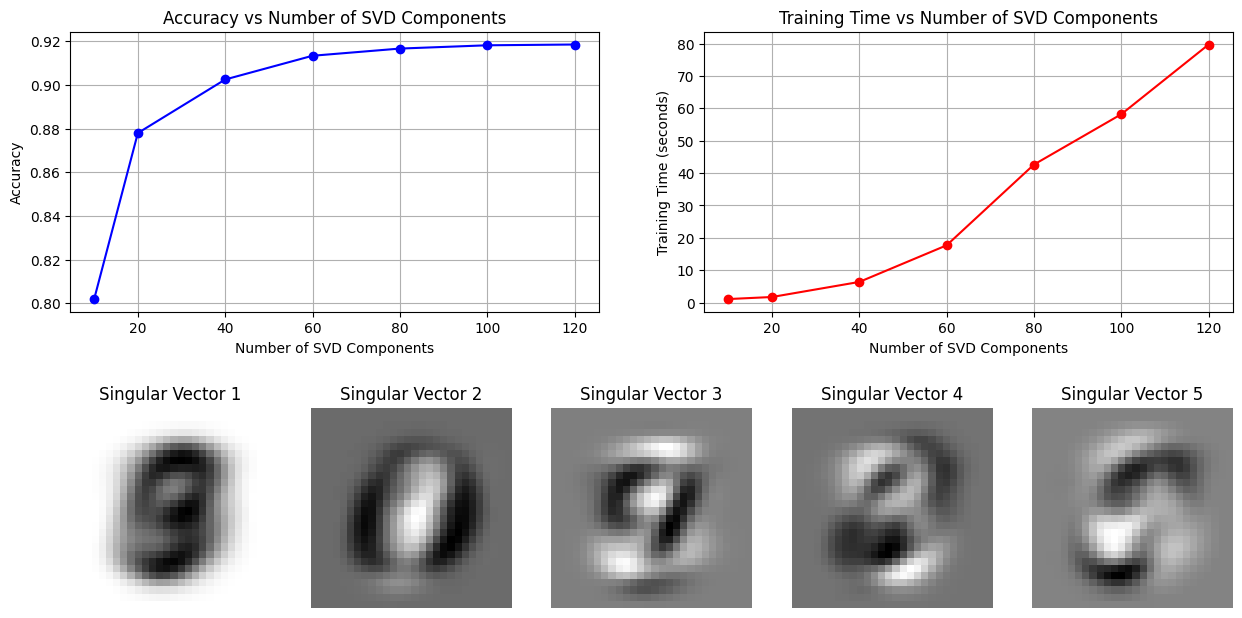

In [ ]:
## Your implementation here...

def visualize_results(U_train, results, image_shape=(28, 28)):
    """
    Visualize accuracy, training time as a function of SVD components, and display top singular vectors.

    Parameters:
    - U_train: Left singular vectors (matrix from SVD) of shape (n_samples, n_components)
    - results: List of tuples (number_of_svd_components, accuracy, training_time)
    - image_shape: Shape to reshape the singular vectors (default is (28, 28))
    """

    # 1. Extract results for plotting
    components = [result[0] for result in results]  # Number of SVD components
    accuracies = [result[1] for result in results]  # Accuracy for each component
    times = [result[2] for result in results]       # Training time for each component

    # 2. Plot Accuracy and Training Time vs. Number of SVD Components
    plt.figure(figsize=(15, 8))

    # Subplot 1: Accuracy vs Number of SVD Components
    plt.subplot(2, 2, 1)
    plt.plot(components, accuracies, marker='o', color='blue')
    plt.title('Accuracy vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Accuracy')
    plt.grid(True)

    # Subplot 2: Training Time vs Number of SVD Components
    plt.subplot(2, 2, 2)
    plt.plot(components, times, marker='o', color='red')
    plt.title('Training Time vs Number of SVD Components')
    plt.xlabel('Number of SVD Components')
    plt.ylabel('Training Time (seconds)')
    plt.grid(True)

    # 3. Visualize the Top 5 Singular Vectors based on image features
    num_vectors = 5  # Define how many singular vectors to visualize (defaulting to 5)
    for i in range(num_vectors):
        plt.subplot(2, 5, 6 + i)  # To place the singular vectors below the plots
        singular_vector = U[:, i]  # Get the i-th singular vector (should be of length 784)

        # Reshape the vector to the shape of an MNIST image (28x28)
        image = singular_vector.reshape(image_shape)

        # Plot the reshaped singular vector as an image
        plt.imshow(image, cmap='gray')
        plt.title(f'Singular Vector {i+1}')
        plt.axis('off')  # Turn off axes for images

    plt.tight_layout()
    plt.show()

# Apply the SVD on the covariance matrix of image features
U, S = apply_svd_custom(X_train, X_test, n_components=5)

# Example of how to call this function:
# Assuming `results` contains [(10, 0.80, 15), (20, 0.82, 25), (50, 0.85, 40), ...]

# Call the visualization function with the updated singular vectors U
visualize_results(U, results)

## You may add necessary lines in Part 4 to access data for visualization

## Part 6: Analyze / Conclusion

YOUR ANSWER:

In [ ]:
#The best number of SVD components is 40-60. Because in this interval, it maximize the accuracy, while minimize the traing time. from 0 to 40, the accuracy increase rapidly, while the training time does not increase alot. From 60 to above, the accuracy does not increase a lot, but the training time increase rapidely.